# 📥 Tải và Chuẩn bị Dữ liệu ISIC Dataset

Notebook này thực hiện:
- Tải dữ liệu ISIC từ Google Drive API
- Giải nén và tạo cấu trúc thư mục
- Khám phá và visualize dữ liệu
- Chuẩn bị dataset cho training

## Dataset: ISIC (International Skin Imaging Collaboration)
- Training images: ~2000+ ảnh
- Validation images: ~150+ ảnh  
- Test images: ~600+ ảnh
- Format: JPG (images) và PNG (masks)

## 1. Import thư viện cần thiết

In [1]:
# Cài đặt các thư viện cần thiết
!pip install google-api-python-client google-auth google-auth-oauthlib google-auth-httplib2
!pip install rarfile tqdm matplotlib seaborn pillow opencv-python-headless
!pip install numpy pandas

In [2]:
! pip install rarfile

In [3]:
# Cài đặt thêm các tools giải nén (tùy chọn)
import platform
import subprocess

system = platform.system().lower()
print(f"🖥️  Hệ điều hành: {system}")

if system == 'linux':
    print("🔧 Thử cài đặt unrar cho Linux...")
    try:
        subprocess.run(['sudo', 'apt', 'install', '-y', 'unrar'], check=True, capture_output=True)
        print("✅ Đã cài đặt unrar thành công")
    except:
        print("⚠️  Không thể cài đặt unrar tự động. Sẽ sử dụng rarfile library")
elif system == 'darwin':
    print("🔧 Thử cài đặt unrar cho macOS...")
    try:
        subprocess.run(['brew', 'install', 'unrar'], check=True, capture_output=True)
        print("✅ Đã cài đặt unrar thành công")
    except:
        print("⚠️  Không thể cài đặt unrar tự động. Sẽ sử dụng rarfile library")
else:
    print("✅ Windows: Sẽ sử dụng rarfile library")

🖥️  Hệ điều hành: windows
✅ Windows: Sẽ sử dụng rarfile library


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Import data downloader
from data_downloader import GoogleDriveDownloader, DatasetManager

print("✅ Import thành công!")

✅ Import thành công!


## 2. Tải dữ liệu từ Google Drive

In [5]:
# Google Drive File ID từ link: https://drive.google.com/file/d/1IL3JPRaxhKoQMjPk_AzNK5w4OsE2gjsI/view?usp=sharing
GOOGLE_DRIVE_FILE_ID = "1IL3JPRaxhKoQMjPk_AzNK5w4OsE2gjsI"

print("🚀 Bắt đầu tải ISIC dataset từ Google Drive...")
print("⚠️  Lưu ý: Quá trình này có thể mất vài phút tùy thuộc vào tốc độ mạng")
print("📋 Yêu cầu: File service_account.json phải tồn tại trong thư mục gốc")

try:
    # Khởi tạo downloader
    downloader = GoogleDriveDownloader('service_account.json')
    dataset_manager = DatasetManager(downloader)
    
    # Tải và giải nén dataset
    success = dataset_manager.download_and_extract_dataset(GOOGLE_DRIVE_FILE_ID)
    
    if success:
        print("\n🎉 Tải dữ liệu thành công!")
    else:
        print("\n❌ Tải dữ liệu thất bại!")
        print("💡 Hướng dẫn khắc phục:")
        print("1. Kiểm tra file service_account.json")
        print("2. Đảm bảo service account có quyền truy cập file")
        print("3. Kiểm tra kết nối internet")
        
except Exception as e:
    print(f"❌ Lỗi: {str(e)}")
    print("\n💡 Thử tải thủ công từ: https://drive.google.com/file/d/1IL3JPRaxhKoQMjPk_AzNK5w4OsE2gjsI/view?usp=sharing")

🚀 Bắt đầu tải ISIC dataset từ Google Drive...
⚠️  Lưu ý: Quá trình này có thể mất vài phút tùy thuộc vào tốc độ mạng
📋 Yêu cầu: File service_account.json phải tồn tại trong thư mục gốc
✅ Xác thực Google Drive API thành công
🚀 Bắt đầu tải ISIC dataset từ Google Drive...
⚠️  Lưu ý: Quá trình này có thể mất vài phút tùy thuộc vào tốc độ mạng
🔧 Kiểm tra và cài đặt dependencies...
✅ rarfile package đã có sẵn
✅ Windows: Sử dụng rarfile library

📥 Đang tải data.rar từ Google Drive...
📥 Đang tải file: data.rar
📊 Kích thước: Không xác định (file có thể được nén hoặc là Google Docs)
📥 Đang tải... (hiển thị tiến trình theo %)
📥 Tiến trình: 1%
📥 Tiến trình: 2%
📥 Tiến trình: 3%
📥 Tiến trình: 4%
📥 Tiến trình: 5%
📥 Tiến trình: 6%
📥 Tiến trình: 7%
📥 Tiến trình: 8%
📥 Tiến trình: 9%
📥 Tiến trình: 10%
📥 Tiến trình: 11%
📥 Tiến trình: 12%
📥 Tiến trình: 13%
📥 Tiến trình: 14%
📥 Tiến trình: 15%
📥 Tiến trình: 16%
📥 Tiến trình: 17%
📥 Tiến trình: 18%
📥 Tiến trình: 19%
📥 Tiến trình: 20%
📥 Tiến trình: 21%
📥 Tiến t

Extracting:   0%|          | 0/7398 [00:00<?, ?it/s]

⚠️  rarfile library thất bại: Cannot find working tool
🔧 Thử sử dụng unrar command line...
⚠️  unrar command thất bại: [WinError 2] The system cannot find the file specified
🔧 Thử sử dụng 7zip...
⚠️  7zip không có sẵn
❌ Tất cả phương pháp giải nén RAR đều thất bại!
💡 Hướng dẫn khắc phục:
   1. Cài đặt rarfile: pip install rarfile
   2. Cài đặt unrar:
      - Ubuntu/Debian: sudo apt install unrar
      - CentOS/RHEL: sudo yum install unrar
      - macOS: brew install unrar
      - Windows: Tải WinRAR hoặc 7-Zip
   3. Hoặc tải file ZIP thay vì RAR

❌ Tải dữ liệu thất bại!
💡 Hướng dẫn khắc phục:
1. Kiểm tra file service_account.json
2. Đảm bảo service account có quyền truy cập file
3. Kiểm tra kết nối internet


## 3. Kiểm tra cấu trúc dữ liệu

In [6]:
def check_data_structure():
    """Kiểm tra cấu trúc thư mục và số lượng file"""
    
    data_info = {}
    
    # Kiểm tra các thư mục chính
    main_dirs = ['data/train', 'data/val', 'data/test']
    
    for main_dir in main_dirs:
        if os.path.exists(main_dir):
            images_dir = os.path.join(main_dir, 'images')
            masks_dir = os.path.join(main_dir, 'ground_truth')
            
            num_images = len(os.listdir(images_dir)) if os.path.exists(images_dir) else 0
            num_masks = len(os.listdir(masks_dir)) if os.path.exists(masks_dir) else 0
            
            data_info[main_dir] = {
                'images': num_images,
                'masks': num_masks
            }
            
            print(f"📁 {main_dir}:")
            print(f"   - Images: {num_images} files")
            print(f"   - Masks: {num_masks} files")
            print(f"   - Match: {'✅' if num_images == num_masks else '❌'}")
            print()
        else:
            print(f"❌ Thư mục {main_dir} không tồn tại")
    
    return data_info

# Kiểm tra cấu trúc dữ liệu
print("📊 Kiểm tra cấu trúc dữ liệu:")
print("=" * 50)
data_info = check_data_structure()

# Tổng kết
total_images = sum([info['images'] for info in data_info.values()])
total_masks = sum([info['masks'] for info in data_info.values()])

print(f"📈 Tổng kết:")
print(f"   - Tổng số ảnh: {total_images}")
print(f"   - Tổng số mask: {total_masks}")
print(f"   - Trạng thái: {'✅ Hoàn chỉnh' if total_images == total_masks and total_images > 0 else '❌ Có vấn đề'}")

📊 Kiểm tra cấu trúc dữ liệu:
📁 data/train:
   - Images: 2594 files
   - Masks: 2594 files
   - Match: ✅

📁 data/val:
   - Images: 100 files
   - Masks: 100 files
   - Match: ✅

📁 data/test:
   - Images: 1000 files
   - Masks: 1000 files
   - Match: ✅

📈 Tổng kết:
   - Tổng số ảnh: 3694
   - Tổng số mask: 3694
   - Trạng thái: ✅ Hoàn chỉnh


## 4. Khám phá dữ liệu (Data Exploration)

In [7]:
def load_sample_data(data_dir='data/train', num_samples=5):
    """Load một số sample để khám phá"""
    
    images_dir = os.path.join(data_dir, 'images')
    masks_dir = os.path.join(data_dir, 'ground_truth')
    
    if not os.path.exists(images_dir) or not os.path.exists(masks_dir):
        print(f"❌ Thư mục {data_dir} không tồn tại hoặc không đầy đủ")
        return None, None
    
    # Lấy danh sách file
    image_files = sorted([f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])
    mask_files = sorted([f for f in os.listdir(masks_dir) if f.endswith('.png')])
    
    print(f"📁 Thư mục: {data_dir}")
    print(f"📸 Số ảnh: {len(image_files)}")
    print(f"🎭 Số mask: {len(mask_files)}")
    
    # Load samples
    samples = []
    for i in range(min(num_samples, len(image_files))):
        img_path = os.path.join(images_dir, image_files[i])
        
        # Tìm mask tương ứng
        img_name = os.path.splitext(image_files[i])[0]
        mask_name = None
        
        # Thử các pattern tên mask phổ biến
        possible_mask_names = [
            f"{img_name}_segmentation.png",
            f"{img_name}_mask.png",
            f"{img_name}.png"
        ]
        
        for possible_name in possible_mask_names:
            if possible_name in mask_files:
                mask_name = possible_name
                break
        
        if mask_name:
            mask_path = os.path.join(masks_dir, mask_name)
            
            # Load image và mask
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            
            samples.append({
                'image': image,
                'mask': mask,
                'image_name': image_files[i],
                'mask_name': mask_name
            })
    
    return samples, {'total_images': len(image_files), 'total_masks': len(mask_files)}

# Load samples từ training set
print("🔍 Đang load sample data...")
samples, stats = load_sample_data('data/train', num_samples=6)

if samples:
    print(f"✅ Đã load {len(samples)} samples thành công!")
else:
    print("❌ Không thể load sample data")

🔍 Đang load sample data...
📁 Thư mục: data/train
📸 Số ảnh: 2594
🎭 Số mask: 2594
✅ Đã load 6 samples thành công!


🎨 Hiển thị sample data:


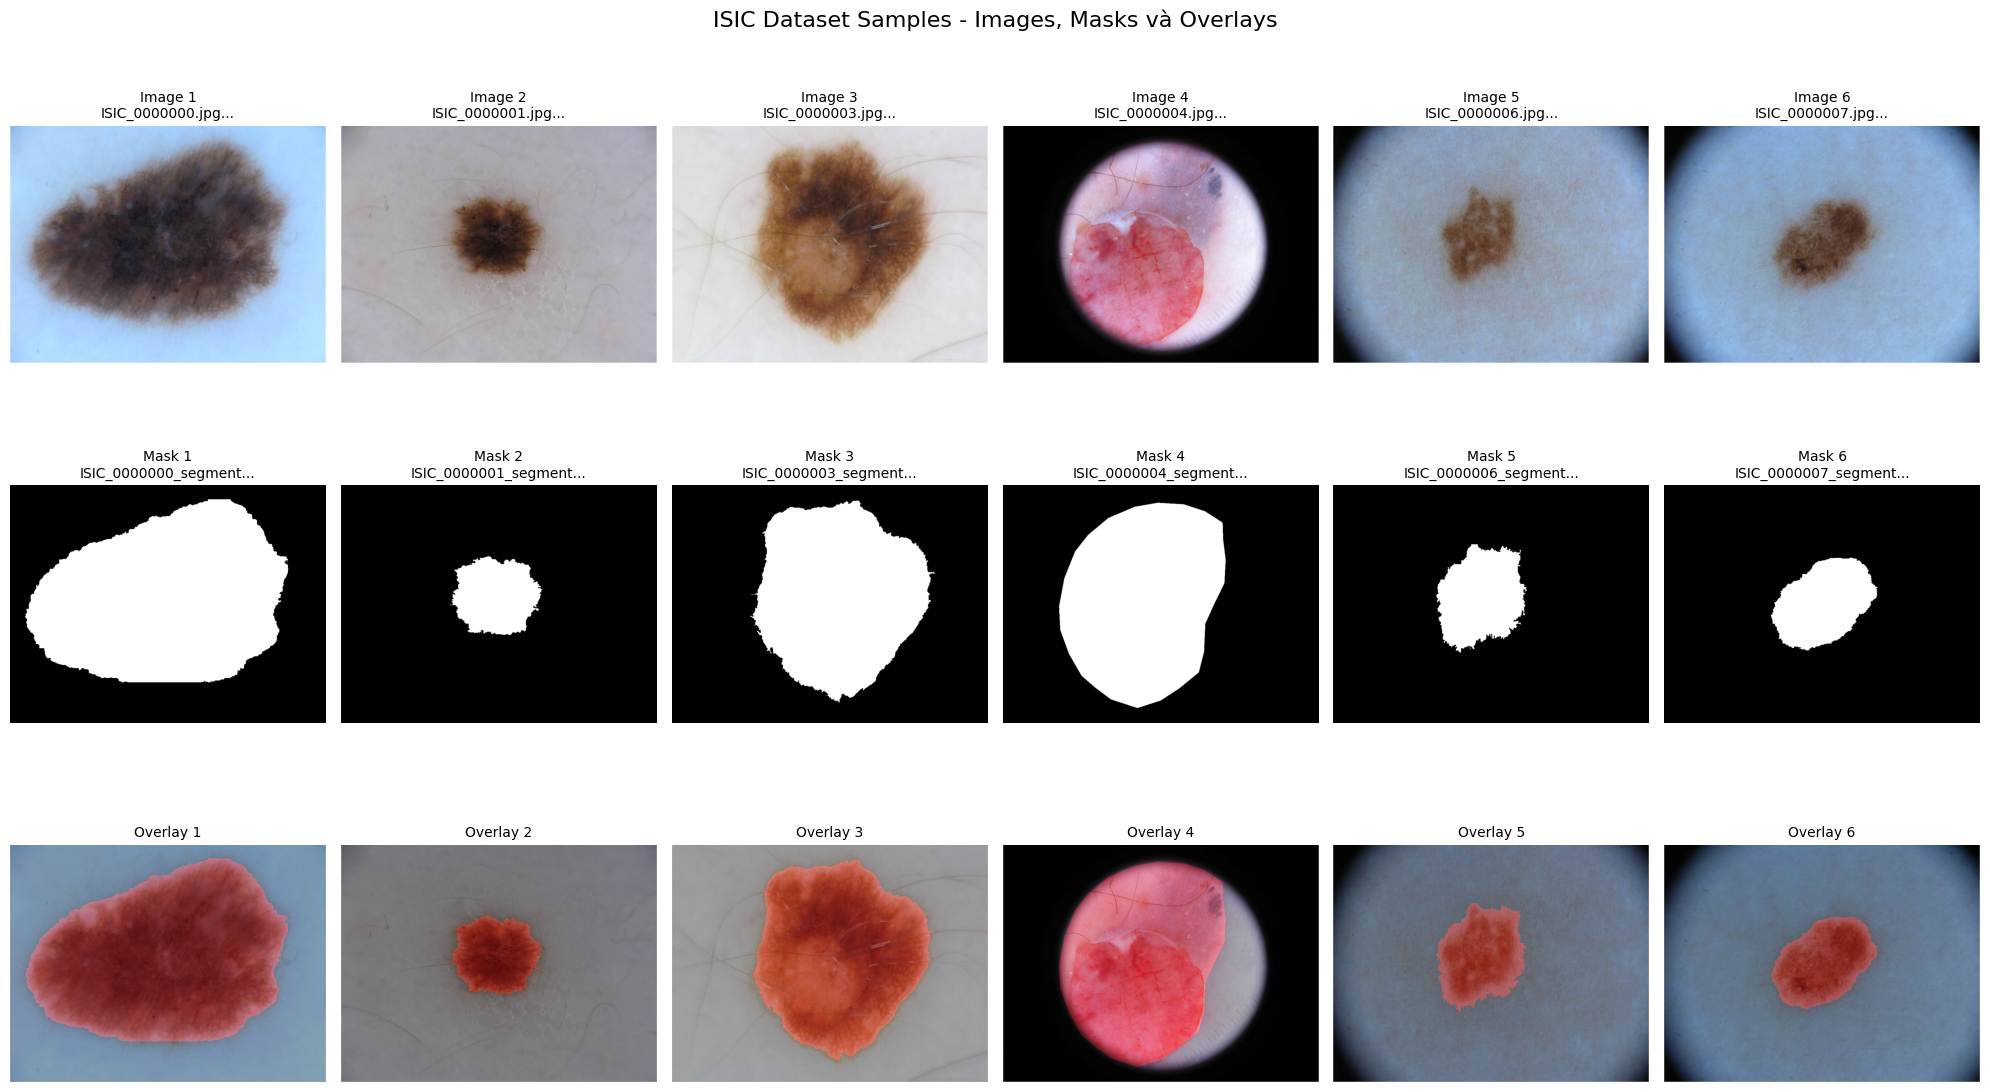

In [8]:
def visualize_samples(samples, num_display=6):
    """Visualize các sample images và masks"""
    
    if not samples:
        print("❌ Không có sample để hiển thị")
        return
    
    num_display = min(num_display, len(samples))
    
    fig, axes = plt.subplots(3, num_display, figsize=(20, 12))
    
    for i in range(num_display):
        sample = samples[i]
        image = sample['image']
        mask = sample['mask']
        
        # Original image
        axes[0, i].imshow(image)
        axes[0, i].set_title(f'Image {i+1}\n{sample["image_name"][:20]}...', fontsize=10)
        axes[0, i].axis('off')
        
        # Mask
        axes[1, i].imshow(mask, cmap='gray')
        axes[1, i].set_title(f'Mask {i+1}\n{sample["mask_name"][:20]}...', fontsize=10)
        axes[1, i].axis('off')
        
        # Overlay
        overlay = image.copy()
        mask_colored = np.zeros_like(image)
        mask_colored[:, :, 0] = mask  # Red channel for mask
        overlay = cv2.addWeighted(overlay, 0.7, mask_colored, 0.3, 0)
        
        axes[2, i].imshow(overlay)
        axes[2, i].set_title(f'Overlay {i+1}', fontsize=10)
        axes[2, i].axis('off')
    
    plt.suptitle('ISIC Dataset Samples - Images, Masks và Overlays', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

# Visualize samples
if samples:
    print("🎨 Hiển thị sample data:")
    visualize_samples(samples, num_display=6)
else:
    print("❌ Không có data để visualize")

## 5. Phân tích thống kê dữ liệu

In [9]:
def analyze_dataset_statistics():
    """Phân tích thống kê về kích thước ảnh, phân bố mask, etc."""
    
    stats = {'train': {}, 'val': {}, 'test': {}}
    
    for split in ['train', 'val', 'test']:
        images_dir = f'data/{split}/images'
        masks_dir = f'data/{split}/ground_truth'
        
        if not os.path.exists(images_dir):
            continue
            
        image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        # Phân tích kích thước ảnh
        image_sizes = []
        mask_ratios = []  # Tỷ lệ pixel mask/total pixel
        
        print(f"📊 Đang phân tích {split} set...")
        
        for img_file in tqdm(image_files[:50], desc=f"Analyzing {split}"):  # Chỉ phân tích 50 ảnh đầu
            img_path = os.path.join(images_dir, img_file)
            
            # Load image để lấy kích thước
            img = Image.open(img_path)
            image_sizes.append(img.size)  # (width, height)
            
            # Tìm mask tương ứng
            img_name = os.path.splitext(img_file)[0]
            possible_mask_names = [
                f"{img_name}_segmentation.png",
                f"{img_name}_mask.png",
                f"{img_name}.png"
            ]
            
            mask_path = None
            for mask_name in possible_mask_names:
                potential_path = os.path.join(masks_dir, mask_name)
                if os.path.exists(potential_path):
                    mask_path = potential_path
                    break
            
            if mask_path:
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                if mask is not None:
                    # Tính tỷ lệ pixel mask
                    mask_binary = (mask > 127).astype(np.uint8)
                    mask_ratio = np.sum(mask_binary) / (mask.shape[0] * mask.shape[1])
                    mask_ratios.append(mask_ratio)
        
        # Lưu thống kê
        if image_sizes:
            widths = [size[0] for size in image_sizes]
            heights = [size[1] for size in image_sizes]
            
            stats[split] = {
                'num_images': len(image_files),
                'analyzed_images': len(image_sizes),
                'avg_width': np.mean(widths),
                'avg_height': np.mean(heights),
                'min_width': np.min(widths),
                'max_width': np.max(widths),
                'min_height': np.min(heights),
                'max_height': np.max(heights),
                'avg_mask_ratio': np.mean(mask_ratios) if mask_ratios else 0,
                'std_mask_ratio': np.std(mask_ratios) if mask_ratios else 0
            }
    
    return stats

# Chạy phân tích thống kê
print("📈 Bắt đầu phân tích thống kê dataset...")
dataset_stats = analyze_dataset_statistics()

# Hiển thị kết quả
print("\n📊 Kết quả phân tích:")
print("=" * 60)

for split, stats in dataset_stats.items():
    if stats:
        print(f"\n📁 {split.upper()} SET:")
        print(f"   - Tổng số ảnh: {stats['num_images']}")
        print(f"   - Đã phân tích: {stats['analyzed_images']} ảnh")
        print(f"   - Kích thước trung bình: {stats['avg_width']:.0f} x {stats['avg_height']:.0f}")
        print(f"   - Kích thước min: {stats['min_width']} x {stats['min_height']}")
        print(f"   - Kích thước max: {stats['max_width']} x {stats['max_height']}")
        print(f"   - Tỷ lệ mask trung bình: {stats['avg_mask_ratio']:.3f} ± {stats['std_mask_ratio']:.3f}")

📈 Bắt đầu phân tích thống kê dataset...
📊 Đang phân tích train set...


Analyzing train:   0%|          | 0/50 [00:00<?, ?it/s]

Analyzing train: 100%|██████████| 50/50 [00:00<00:00, 192.61it/s]


📊 Đang phân tích val set...


Analyzing val: 100%|██████████| 50/50 [00:01<00:00, 31.08it/s]


📊 Đang phân tích test set...


Analyzing test: 100%|██████████| 50/50 [00:02<00:00, 20.25it/s]


📊 Kết quả phân tích:

📁 TRAIN SET:
   - Tổng số ảnh: 2594
   - Đã phân tích: 50 ảnh
   - Kích thước trung bình: 1369 x 1028
   - Kích thước min: 1022 x 767
   - Kích thước max: 1504 x 1129
   - Tỷ lệ mask trung bình: 0.306 ± 0.143

📁 VAL SET:
   - Tổng số ảnh: 100
   - Đã phân tích: 50 ảnh
   - Kích thước trung bình: 2117 x 1462
   - Kích thước min: 640 x 480
   - Kích thước max: 6708 x 4461
   - Tỷ lệ mask trung bình: 0.276 ± 0.197

📁 TEST SET:
   - Tổng số ảnh: 1000
   - Đã phân tích: 50 ảnh
   - Kích thước trung bình: 3280 x 2217
   - Kích thước min: 1024 x 768
   - Kích thước max: 6701 x 4477
   - Tỷ lệ mask trung bình: 0.200 ± 0.185


## 6. Tạo summary và chuẩn bị cho training

In [10]:
def create_dataset_summary():
    """Tạo summary về dataset để sử dụng cho các notebook training"""
    
    summary = {
        'dataset_name': 'ISIC Skin Lesion Segmentation',
        'data_path': 'data/',
        'image_format': 'JPG/JPEG',
        'mask_format': 'PNG',
        'target_size': (512, 512),  # Kích thước resize cho training
        'num_classes': 1,  # Binary segmentation
        'splits': {}
    }
    
    # Đếm số file trong mỗi split
    for split in ['train', 'val', 'test']:
        images_dir = f'data/{split}/images'
        masks_dir = f'data/{split}/ground_truth'
        
        if os.path.exists(images_dir) and os.path.exists(masks_dir):
            num_images = len([f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])
            num_masks = len([f for f in os.listdir(masks_dir) if f.endswith('.png')])
            
            summary['splits'][split] = {
                'images': num_images,
                'masks': num_masks,
                'images_path': images_dir,
                'masks_path': masks_dir
            }
    
    return summary

# Tạo summary
dataset_summary = create_dataset_summary()

print("📋 DATASET SUMMARY")
print("=" * 50)
print(f"Dataset: {dataset_summary['dataset_name']}")
print(f"Data path: {dataset_summary['data_path']}")
print(f"Target size: {dataset_summary['target_size']}")
print(f"Number of classes: {dataset_summary['num_classes']}")
print()

total_images = 0
for split, info in dataset_summary['splits'].items():
    print(f"{split.upper()}: {info['images']} images, {info['masks']} masks")
    total_images += info['images']

print(f"\nTOTAL: {total_images} images")

print("\n✅ Dataset đã sẵn sàng cho training!")
print("\n📝 Bước tiếp theo:")
print("1. Chạy notebook 02_train_segformer.ipynb để train SegFormer")
print("2. Chạy notebook 03_train_unet_efficientnet.ipynb để train U-Net EfficientNet")
print("3. Chạy notebook 04_train_unet_vit.ipynb để train U-Net ViT")
print("4. Chạy notebook 05_train_deeplabv3_resnet.ipynb để train DeepLabV3+ ResNet")

📋 DATASET SUMMARY
Dataset: ISIC Skin Lesion Segmentation
Data path: data/
Target size: (512, 512)
Number of classes: 1

TRAIN: 2594 images, 2594 masks
VAL: 100 images, 100 masks
TEST: 1000 images, 1000 masks

TOTAL: 3694 images

✅ Dataset đã sẵn sàng cho training!

📝 Bước tiếp theo:
1. Chạy notebook 02_train_segformer.ipynb để train SegFormer
2. Chạy notebook 03_train_unet_efficientnet.ipynb để train U-Net EfficientNet
3. Chạy notebook 04_train_unet_vit.ipynb để train U-Net ViT
4. Chạy notebook 05_train_deeplabv3_resnet.ipynb để train DeepLabV3+ ResNet


## 🎯 Kết luận

Notebook này đã hoàn thành:
- ✅ Tải dữ liệu ISIC từ Google Drive API
- ✅ Giải nén và tạo cấu trúc thư mục
- ✅ Kiểm tra tính toàn vẹn dữ liệu
- ✅ Khám phá và visualize samples
- ✅ Phân tích thống kê dataset
- ✅ Chuẩn bị summary cho training

**Dataset đã sẵn sàng cho việc training các models!**

### 📁 Cấu trúc dữ liệu:
```
data/
├── train/
│   ├── images/          # Training images
│   └── ground_truth/    # Training masks
├── val/
│   ├── images/          # Validation images
│   └── ground_truth/    # Validation masks
└── test/
    ├── images/          # Test images
    └── ground_truth/    # Test masks
```

### 🚀 Tiếp theo:
Chạy các notebook training để train 4 models khác nhau:
1. **SegFormer** - Transformer-based segmentation
2. **U-Net EfficientNet** - CNN với EfficientNet backbone
3. **U-Net ViT** - Hybrid ViT + U-Net architecture
4. **DeepLabV3+ ResNet** - Multi-scale segmentation với ResNet